In [2]:
import torch
import pytorch_mask_rcnn as pmr


use_cuda = True
dataset = "coco"
ckpt_path = "maskrcnn_coco-25.pth"
data_dir = "../Vegas_coco_random_splits/"

device = torch.device("cuda" if torch.cuda.is_available() and use_cuda else "cpu")
if device.type == "cuda":
    pmr.get_gpu_prop(show=True)
print("\ndevice: {}".format(device))

ds = pmr.datasets(dataset, data_dir, "test", train=True)
#indices = torch.randperm(len(ds)).tolist()
#d = torch.utils.data.Subset(ds, indices)
d = torch.utils.data.DataLoader(ds, shuffle=False)

model = pmr.maskrcnn_resnet50(False, max(ds.classes) + 1).to(device)
model.eval()
model.head.score_thresh = 0.3

if ckpt_path:
    checkpoint = torch.load(ckpt_path, map_location=device)
    model.load_state_dict(checkpoint["model"])
    print(checkpoint["eval_info"])
    del checkpoint
    
for p in model.parameters():
    p.requires_grad_(False)

cuda: True
available GPU(s): 1
0: {'name': 'Quadro RTX 6000', 'capability': [7, 5], 'total_momory': 23.65, 'sm_count': 72}

device: cuda
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.557
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.773
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.663
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.729
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.639
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.028
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.595
 Average Recall     (AR) @[ IoU=0.50:0.95 |

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


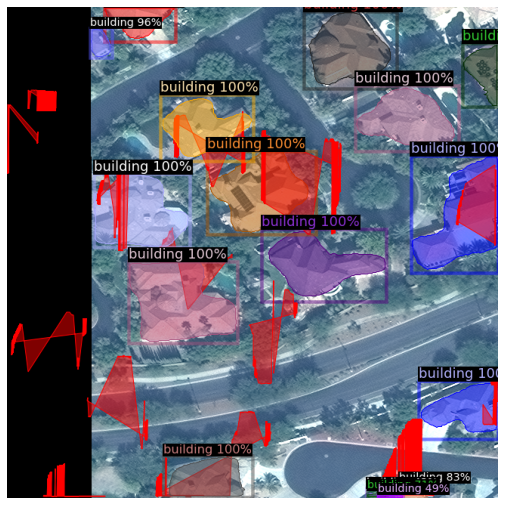

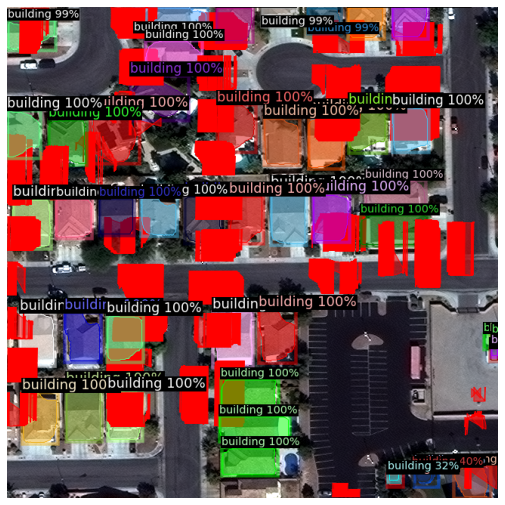

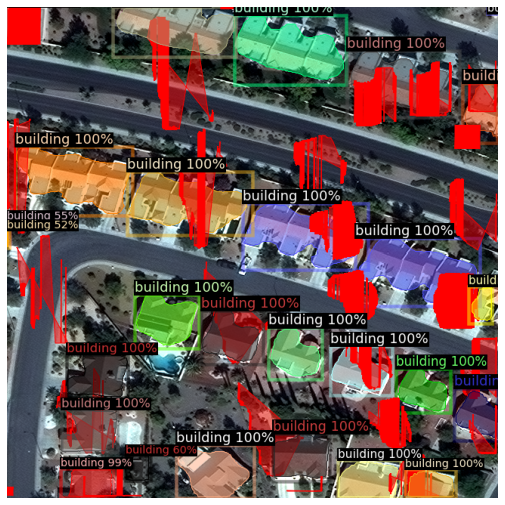

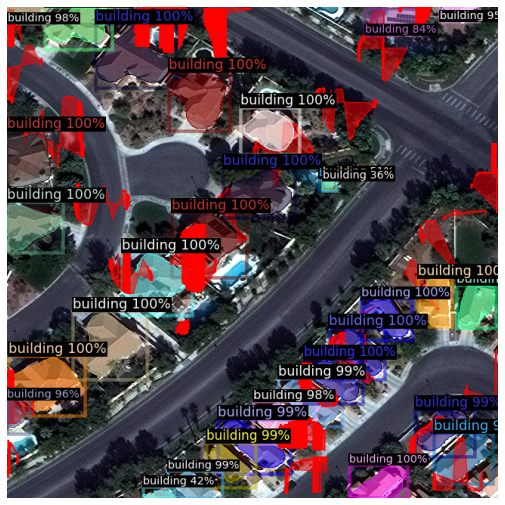

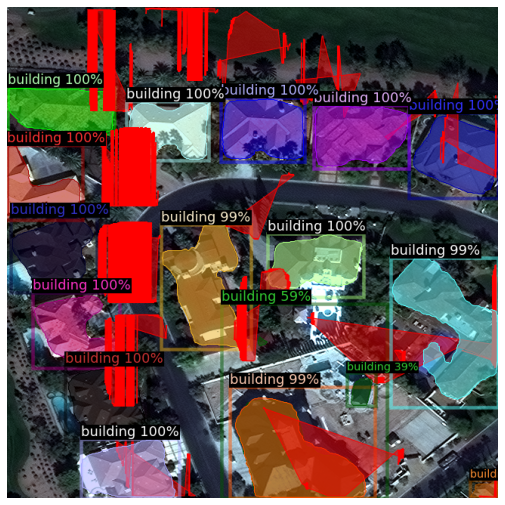

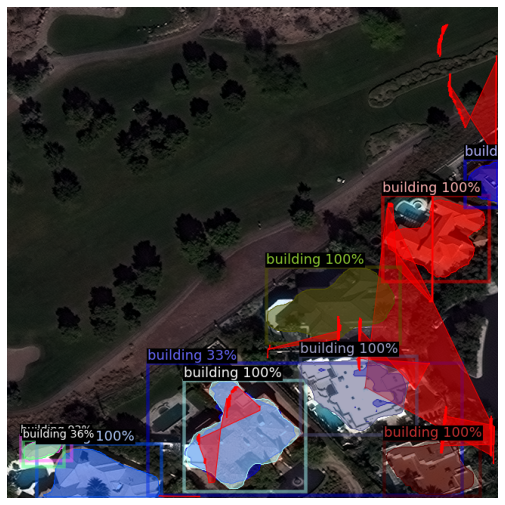

In [3]:
iters = 6

for i, (image, target) in enumerate(d):
    image = image.to(device)[0]
    #target = {k: v.to(device) for k, v in target.items()}
    
    with torch.no_grad():
        result = model(image)
    # print(result)
    pmr.show(image, result, ds.classes, "./images/output{}.jpg".format(i))

    if i >= iters - 1:
        break